# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

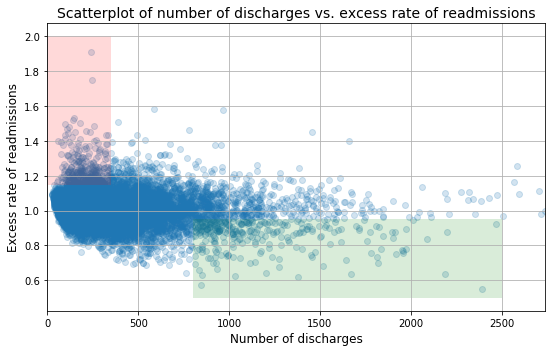

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

# A. Do you agree with the above analysis and recommendations? Why or why not?

I disagree with the above conclusion because it is incomplete. Providing a scatterplot and then drawing a conclusion based purely on the scatterplot is not the right way to draw conclusions. No hypothesis is presented or tested, and no precise correlations are calculated. 

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.

H0 = There is no statistically significant correlation between the Number of Discharges and the Excess Readmission Ratio

Ha = There is a statistically significant correlation between the Number of Discharges and Excess Readmission Ratio

Alpha = 0.01

2. Compute and report the observed significance value (or p-value).

To see if there is really a correlation, we can go ahead and calculation the Pearson coefficient. 

In [12]:
# To start, let's remove the rows that have NaN values for the Number of Discharges and Excess Readmission Ratio
clean_hospital_df = clean_hospital_read_df.dropna(subset=['Number of Discharges', 'Excess Readmission Ratio'])
number_discharges = clean_hospital_df['Number of Discharges'].values
excess_readmit_ratio = clean_hospital_df['Excess Readmission Ratio'].values

In [14]:
# Calculate the correlation
pearson_r = np.corrcoef(number_discharges, excess_readmit_ratio)[0, 1]

In [15]:
pearson_r

-0.09739794351079353

There appears to be very slight negative correlation of around -0.097. Let's do a bootstrap check to see if this result is statistically significant.

In [16]:
# Initialize permutation replicates
perm_replicates = np.empty(100000)

# Draw replicates
for i in range(100000):
    # Permute number of discharges 
    number_discharges_perm = np.random.permutation(number_discharges)
    
    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(number_discharges_perm, excess_readmit_ratio)[0,1]

# Compute p-value
p = np.sum(perm_replicates <= pearson_r) / len(perm_replicates)
print('p-value = ', p)

p-value =  0.0


# 3. Report statistical significance for  𝛼  = .01

Given the p-value is below the alpha level of 0.01, it looks like there is a statistically significant negative correlation of around -.097 between the number of discharges and the excess readmission ratio. Therefore, we can reject the null hypothesis that there is no correlation. 

# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Because the coefficient of correlation is less than 0.1, the correlation that exists is extremely weak and practically insignificant. As a result, we can't confidently conclude that hospitals with higher discharge counts have lower excess readmission ratios. 

I would disagree with the recommendations to require smaller hospitals to demonstrate upgraded resource allocation. There is nothing to suggest that these smaller hospitals should be targetted specifically. I also disagree with the recommendation to consolidate smaller hospitals into larger ones. The potential risks, including fewer people having closer access to care, far outweigh the potential decline in Excess Readmissions. 

# 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The plot above has the advantage of showing the ranges of values of Discharge counts and Excess Readmission Ratios. Beyond that, it is very misleading. The main cluster of data points has mostly overlapping values and does not convey an accurate sense of how many hospitals lie in this range. The placement of the green and red boxes is arbitrary and drives the perception that there is a stronger correlation than really exists. The relatively few hospitals that fall into the green and red ranges visually contribute to the perception of a correlation in a misleading way. 

In [17]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    
    # Set up array of indices to sample from
    inds = np.arange(len(x))
    
    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

Slope =  -2.901051733057071e-05 conf int = [-3.57977120e-05 -2.29449766e-05]
Intercept = 1.0181061473733573 conf int = [1.01555377 1.02066077]


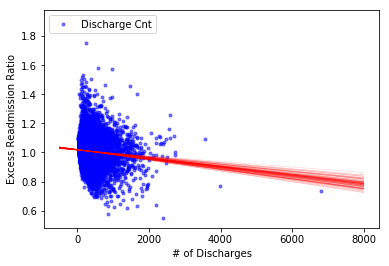

In [21]:
# Compute the linear regression
slope, intercept = np.polyfit(number_discharges, excess_readmit_ratio, 1)

# Perform pairs bootstra for the linear regression
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(number_discharges, excess_readmit_ratio, 1000)

# Compute confidence intervals of slope and intercept
slope_conf_int = np.percentile(bs_slope_reps, [2.5, 97.5])
intercept_conf_int = np.percentile(bs_intercept_reps, [2.5, 97.5])

# Print the results
print('Slope = ', slope, 'conf int =', slope_conf_int)
print('Intercept =', intercept, 'conf int =', intercept_conf_int)

# Make a scatter plot of the data
_ = plt.plot(number_discharges, excess_readmit_ratio, marker = '.', 
            linestyle='none', color='blue', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('# of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.legend(('Discharge Cnt', 'Excess Readmission Ration'), loc='upper left')

# Generate x-values for bootstrap lines
x = np.array([-500, 8000])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()